In [1]:
import graphlab

In [2]:
products = graphlab.SFrame('amazon_baby_subset.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to jayantdahiya1999@gmail.com and will expire on May 27, 2020.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\JAYANT~1\AppData\Local\Temp\graphlab_server_1560989888.log.0


In [3]:
products

name,review,rating,sentiment
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,1
Nature's Lullabies SecondYear Sticker Calendar ...,We wanted to getsomething to keep track ...,5.0,1
Nature's Lullabies SecondYear Sticker Calendar ...,My daughter had her 1stbaby over a year ago. ...,5.0,1
"Lamaze Peekaboo, I LoveYou ...","One of baby's first andfavorite books, and i ...",4.0,1
SoftPlay Peek-A-BooWhere's Elmo A Childr ...,Very cute interactivebook! My son loves this ...,5.0,1
Our Baby Girl Memory Book,"Beautiful book, I love itto record cherished t ...",5.0,1
Hunnt&reg; FallingFlowers and Birds Kids ...,"Try this out for a springproject !Easy ,fun and ...",5.0,1
Blessed By Pope BenedictXVI Divine Mercy Full ...,very nice Divine MercyPendant of Jesus now on ...,5.0,1
Cloth Diaper PinsStainless Steel ...,We bought the pins as my6 year old Autistic son ...,4.0,1
Cloth Diaper PinsStainless Steel ...,It has been many yearssince we needed diaper ...,5.0,1


In [4]:
products['sentiment']

dtype: int
Rows: 53072
[1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, ... ]

In [5]:
products.head(10)['name']

dtype: str
Rows: 10
["Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book", "Nature's Lullabies Second Year Sticker Calendar", "Nature's Lullabies Second Year Sticker Calendar", 'Lamaze Peekaboo, I Love You', "SoftPlay Peek-A-Boo Where's Elmo A Children's Book", 'Our Baby Girl Memory Book', 'Hunnt&reg; Falling Flowers and Birds Kids Nursery Home Decor Vinyl Mural Art Wall Paper Stickers', 'Blessed By Pope Benedict XVI Divine Mercy Full Color Medal', 'Cloth Diaper Pins Stainless Steel Traditional Safety Pin (Black)', 'Cloth Diaper Pins Stainless Steel Traditional Safety Pin (Black)']

In [6]:
print '# of positve reviews =', len(products[products['sentiment']==1])

# of positve reviews = 26579


In [7]:
print '# of negative reviews =', len(products[products['sentiment']==-1])

# of negative reviews = 26493


In [8]:
import json
with open('important_words.json', 'r') as f:
    important_words = json.load(f)
important_words = [str(s) for s in important_words]

In [9]:
print important_words

['baby', 'one', 'great', 'love', 'use', 'would', 'like', 'easy', 'little', 'seat', 'old', 'well', 'get', 'also', 'really', 'son', 'time', 'bought', 'product', 'good', 'daughter', 'much', 'loves', 'stroller', 'put', 'months', 'car', 'still', 'back', 'used', 'recommend', 'first', 'even', 'perfect', 'nice', 'bag', 'two', 'using', 'got', 'fit', 'around', 'diaper', 'enough', 'month', 'price', 'go', 'could', 'soft', 'since', 'buy', 'room', 'works', 'made', 'child', 'keep', 'size', 'small', 'need', 'year', 'big', 'make', 'take', 'easily', 'think', 'crib', 'clean', 'way', 'quality', 'thing', 'better', 'without', 'set', 'new', 'every', 'cute', 'best', 'bottles', 'work', 'purchased', 'right', 'lot', 'side', 'happy', 'comfortable', 'toy', 'able', 'kids', 'bit', 'night', 'long', 'fits', 'see', 'us', 'another', 'play', 'day', 'money', 'monitor', 'tried', 'thought', 'never', 'item', 'hard', 'plastic', 'however', 'disappointed', 'reviews', 'something', 'going', 'pump', 'bottle', 'cup', 'waste', 'retu

In [10]:
def remove_punctuation(text):
    import string
    return text.translate(None, string.punctuation)
products['review_clean'] = products['review'].apply(remove_punctuation)

In [11]:
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s : s.split().count(word))

In [12]:
products['review_clean']

dtype: str
Rows: 53072
['All of my kids have cried nonstop when I tried to ween them off their pacifier until I found Thumbuddy To Loves Binky Fairy Puppet  It is an easy way to work with your kids to allow them to understand where their pacifier is going and help them part from itThis is a must buy book and a great gift for expecting parents  You will save them soo many headachesThanks for this book  You all rock', 'We wanted to get something to keep track of our childs milestones and this is a cute option There arent many other choices out there and this does exactly what we wanted', 'My daughter had her 1st baby over a year ago She did receive and fill up a First Year Calendar When her son was nearing his first birthday she was looking for a Second Year Calendar to record his milestones Thanks to Amazon I was able to get this for her and she LOVES it Tender sweet art work  helpful stickers  unique pages to fill A nice keepsake A wonderful gift for a oneyear old', 'One of babys first

In [13]:
products['perfect']

dtype: int
Rows: 53072
[0L, 0L, 0L, 1L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 1L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 1L, 0L, 1L, 0L, 0L, 1L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, ... ]

In [14]:
products['contains_perfect'] = products['perfect'].apply(lambda x: 1 if x >= 1 else 0)

In [18]:
print 'Number of reviews that contain perfect : {}'.format(products['contains_perfect'].sum())

Number of reviews that contain perfect : 2955


In [19]:
import numpy as np

In [20]:
def get_numpy_data(data_sframe, features, label):
    data_sframe['intercept'] = 1
    features = ['intercept'] + features
    features_sframe = data_sframe[features]
    feature_matrix = features_sframe.to_numpy()
    label_sarray = data_sframe[label]
    label_array = label_sarray.to_numpy()
    return(feature_matrix, label_array)

In [22]:
feature_matrix, sentiment = get_numpy_data(products, important_words, 'sentiment')

In [23]:
feature_matrix.shape

(53072L, 194L)

In [24]:
feature_matrix

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ..., 
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
print 'The total number of features in the feature matrix is: {}'.format(feature_matrix.shape[1])

The total number of features in the feature matrix is: 194


In [26]:
sentiment

array([ 1,  1,  1, ..., -1, -1, -1], dtype=int64)

In [28]:
def predict_probability(feature_matrix, coefficients):
    dot_prod = np.dot(feature_matrix, coefficients)
    predictions = 1 / (1 + np.exp(-dot_prod))
    return predictions

In [29]:
dummy_feature_matrix = np.array([[1.,2.,3.], [1.,-1.,-1]])
dummy_coefficients = np.array([1., 3., -1.])

correct_scores      = np.array( [ 1.*1. + 2.*3. + 3.*(-1.),          1.*1. + (-1.)*3. + (-1.)*(-1.) ] )
correct_predictions = np.array( [ 1./(1+np.exp(-correct_scores[0])), 1./(1+np.exp(-correct_scores[1])) ] )

print 'The following outputs must match '
print '------------------------------------------------'
print 'correct_predictions           =', correct_predictions
print 'output of predict_probability =', predict_probability(dummy_feature_matrix, dummy_coefficients)

The following outputs must match 
------------------------------------------------
correct_predictions           = [ 0.98201379  0.26894142]
output of predict_probability = [ 0.98201379  0.26894142]


In [30]:
def feature_derivative(errors, feature):
    derivative = np.dot(errors, feature)
    return derivative

In [31]:
def compute_log_likelihood(feature_matrix, sentiment, coefficients):
    indicator = (sentiment ==+1)
    scores = np.dot(feature_matrix, coefficients)
    logexp = np.log(1. + np.exp(-scores))
    mask = np.isinf(logexp)
    logexp[mask] = -scores[mask]
    
    lp = np.sum((indicator-1)*scores - logexp)
    return lp

In [32]:
dummy_feature_matrix = np.array([[1.,2.,3.], [1.,-1.,-1]])
dummy_coefficients = np.array([1., 3., -1.])
dummy_sentiment = np.array([-1, 1])

correct_indicators  = np.array( [ -1==+1,                                       1==+1 ] )
correct_scores      = np.array( [ 1.*1. + 2.*3. + 3.*(-1.),                     1.*1. + (-1.)*3. + (-1.)*(-1.) ] )
correct_first_term  = np.array( [ (correct_indicators[0]-1)*correct_scores[0],  (correct_indicators[1]-1)*correct_scores[1] ] )
correct_second_term = np.array( [ np.log(1. + np.exp(-correct_scores[0])),      np.log(1. + np.exp(-correct_scores[1])) ] )

correct_ll          =      sum( [ correct_first_term[0]-correct_second_term[0], correct_first_term[1]-correct_second_term[1] ] ) 

print 'The following outputs must match '
print '------------------------------------------------'
print 'correct_log_likelihood           =', correct_ll
print 'output of compute_log_likelihood =', compute_log_likelihood(dummy_feature_matrix, dummy_sentiment, dummy_coefficients)

The following outputs must match 
------------------------------------------------
correct_log_likelihood           = -5.33141161544
output of compute_log_likelihood = -5.33141161544


In [34]:
from math import sqrt

def logistic_regression(feature_matrix, sentiment, initial_coefficients, step_size, max_iter):
    iteration_list = []
    likelihood_list = []
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in xrange(max_iter):

        # Predict P(y_i = +1|x_i,w) using your predict_probability() function
        predictions = predict_probability(feature_matrix, coefficients) ## ADDED CODE
        
        # Compute indicator value for (y_i = +1)
        indicator = (sentiment==+1)
        
        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        for j in xrange(len(coefficients)): # loop over each coefficient
            
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j].
            # Compute the derivative for coefficients[j]. Save it in a variable called derivative
            derivative = feature_derivative(errors, feature_matrix[:,j]) ## ADDED CODE
            
            # add the step size times the derivative to the current coefficient
            coefficients[j] += step_size * derivative #ADDED CODE
        
        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood(feature_matrix, sentiment, coefficients)
            print 'iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp)
                
            # append values to lists for plotting    
            iteration_list.append(itr)
            likelihood_list.append(lp)
            
    return (coefficients, iteration_list, likelihood_list)

In [36]:
coefficients, iteration_list, likelihood_list = logistic_regression(feature_matrix, sentiment, initial_coefficients=np.zeros(194),
                                   step_size=1e-7, max_iter=301)

iteration   0: log likelihood of observed labels = -36780.91768478
iteration   1: log likelihood of observed labels = -36775.13434712
iteration   2: log likelihood of observed labels = -36769.35713564
iteration   3: log likelihood of observed labels = -36763.58603240
iteration   4: log likelihood of observed labels = -36757.82101962
iteration   5: log likelihood of observed labels = -36752.06207964
iteration   6: log likelihood of observed labels = -36746.30919497
iteration   7: log likelihood of observed labels = -36740.56234821
iteration   8: log likelihood of observed labels = -36734.82152213
iteration   9: log likelihood of observed labels = -36729.08669961
iteration  10: log likelihood of observed labels = -36723.35786366
iteration  11: log likelihood of observed labels = -36717.63499744
iteration  12: log likelihood of observed labels = -36711.91808422
iteration  13: log likelihood of observed labels = -36706.20710739
iteration  14: log likelihood of observed labels = -36700.5020

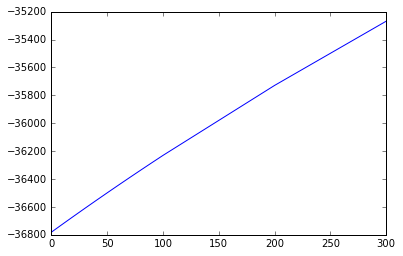

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(iteration_list, likelihood_list)

In [38]:
scores = np.dot(feature_matrix, coefficients)

In [39]:
def class_predictions(score):
    prediction = 1 if score > 0 else -1
    return prediction
vector_predictions = np.vectorize(class_predictions)
predictions = vector_predictions(scores)
print predictions

[ 1 -1  1 ..., -1  1 -1]


In [41]:
unique, counts = np.unique(predictions, return_counts = True)
sentiment_dict = dict(zip(unique, counts))
print 'The number of reviews predicted to have positve sentiment is : {}'.format(sentiment_dict[1])

The number of reviews predicted to have positve sentiment is : 25126


In [44]:
num_mistakes = float(np.not_equal(sentiment, predictions).sum())
accuracy = (len(products) - num_mistakes) / len(products)
print '-------------------------------------------------'
print '# reviews correctly classified  =',len(products) - num_mistakes
print '# reviews incorrectly classified=',num_mistakes
print '# reviews total                 =',len(products)
print '-------------------------------------------------'
print 'Accuracy = %.2f' %accuracy

-------------------------------------------------
# reviews correctly classified  = 39903.0
# reviews incorrectly classified= 13169.0
# reviews total                 = 53072
-------------------------------------------------
Accuracy = 0.75


In [47]:
coefficients = list(coefficients[1:])
word_coefficient_tuples = [(word, coefficient) for word, coefficient in zip(important_words, coefficients)]
word_coefficient_tuples = sorted(word_coefficient_tuples, key=lambda x:x[1], reverse= True)

In [48]:
word_coefficient_tuples[:10]

[('baby', 0.066546084170457695),
 ('one', 0.065890762922123258),
 ('would', 0.06479458680257838),
 ('like', 0.045435626308421365),
 ('daughter', 0.044976401394906038),
 ('seat', 0.030135001092107077),
 ('first', 0.029739937104968462),
 ('little', 0.020077541034775378),
 ('even', 0.018408707995268992),
 ('product', 0.017703199905701694)]

In [49]:
word_coefficient_tuples[-10:]

[('day', -0.024482100545891724),
 ('cup', -0.026592778462247283),
 ('car', -0.027742697230661334),
 ('old', -0.028711552980192574),
 ('plastic', -0.028978976142317068),
 ('recommend', -0.030051249236035804),
 ('best', -0.03306951529475273),
 ('play', -0.038982037286487116),
 ('time', -0.041511033392108904),
 ('love', -0.053860148445203142)]